In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [54]:
bank_data=pd.read_csv('bank.csv')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [55]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [22]:
bank_data.job.unique

<bound method Series.unique of 0             admin.
1             admin.
2         technician
3           services
4             admin.
            ...     
11157    blue-collar
11158       services
11159     technician
11160     technician
11161     technician
Name: job, Length: 11162, dtype: object>

<AxesSubplot:xlabel='education', ylabel='count'>

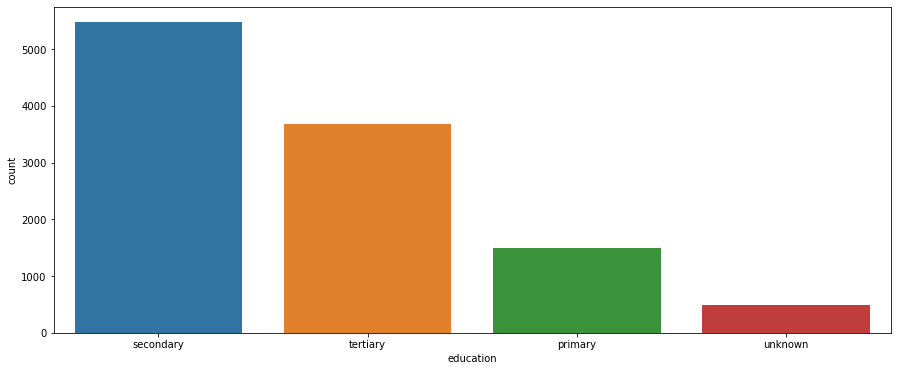

In [23]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'education',data = bank_data )

<AxesSubplot:xlabel='job', ylabel='count'>

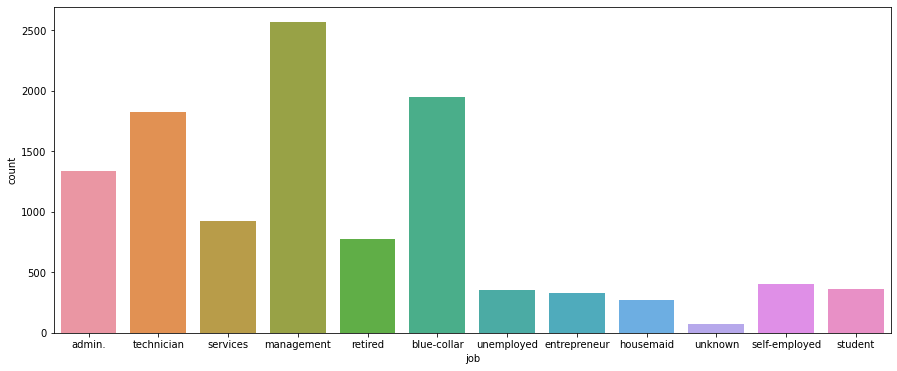

In [6]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'job',data = bank_data )

<AxesSubplot:xlabel='deposit', ylabel='count'>

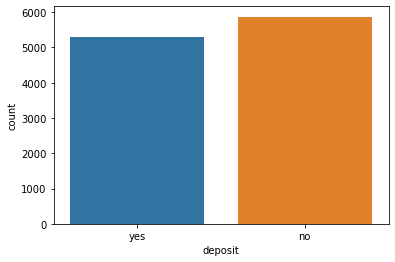

In [79]:
sns.countplot(x= 'deposit',data = bank_data)

In [24]:
bank_data['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [56]:
bank_data.drop(bank_data.columns[[0,3,5,8,9,10,11,12,13,14]],axis=1,inplace=True)

In [26]:
bank_data

,job,marital,default,housing,loan,poutcome,deposit
0,admin.,married,no,yes,no,unknown,yes
1,admin.,married,no,no,no,unknown,yes
2,technician,married,no,yes,no,unknown,yes
3,services,married,no,yes,no,unknown,yes
4,admin.,married,no,no,no,unknown,yes
...,...,...,...,...,...,...,...
11157,blue-collar,single,no,yes,no,unknown,no
11158,services,married,no,no,no,unknown,no
11159,technician,single,no,no,no,unknown,no
11160,technician,married,no,no,yes,failure,no


In [57]:
#we are taking dummies for 'job','marital','default','housing','loan','poutcome','deposit' columns in our data

df = pd.get_dummies(bank_data,columns=['job','marital','default','housing','loan','poutcome'])

In [58]:
df.head()

,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,yes,1,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
1,yes,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
2,yes,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
3,yes,0,0,0,0,0,0,0,1,0,...,1,0,0,1,1,0,0,0,0,1
4,yes,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   deposit            11162 non-null  object
 1   job_admin.         11162 non-null  uint8 
 2   job_blue-collar    11162 non-null  uint8 
 3   job_entrepreneur   11162 non-null  uint8 
 4   job_housemaid      11162 non-null  uint8 
 5   job_management     11162 non-null  uint8 
 6   job_retired        11162 non-null  uint8 
 7   job_self-employed  11162 non-null  uint8 
 8   job_services       11162 non-null  uint8 
 9   job_student        11162 non-null  uint8 
 10  job_technician     11162 non-null  uint8 
 11  job_unemployed     11162 non-null  uint8 
 12  job_unknown        11162 non-null  uint8 
 13  marital_divorced   11162 non-null  uint8 
 14  marital_married    11162 non-null  uint8 
 15  marital_single     11162 non-null  uint8 
 16  default_no         11162 non-null  uint8

In [59]:
#here we are dropping all the unknowns from our data
df.drop(df.columns[[12,25]],axis =1,inplace=True)
df.columns

Index(['deposit', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_other', 'poutcome_success'],
      dtype='object')

In [62]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['deposit']=label_encoder.fit_transform(df['deposit'])
#df['deposit'].unique
df

,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success
0,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,0,0
11158,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,0
11159,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,1,0,0,0,0
11160,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0


In [63]:
x= df.iloc[:,1:]
y=df.iloc[:,0]

In [64]:
x

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,0,0
11158,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
11159,0,0,0,0,0,0,0,0,0,1,...,1,1,0,1,0,1,0,0,0,0
11160,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,1,1,0,0


In [65]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [66]:
y.value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [68]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [69]:
#Predict for X dataset
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [70]:
df1= pd.DataFrame({'actual': y_test,
                         'predicted_prob': y_pred})

In [71]:
df1

,actual,predicted_prob
8422,0,0
9226,0,0
8162,0,1
4337,1,1
2438,1,1
...,...,...
6770,0,0
706,1,0
10998,0,0
6466,0,0


In [72]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[1105  352]
 [ 648  686]]


In [73]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.76      0.69      1457
           1       0.66      0.51      0.58      1334

    accuracy                           0.64      2791
   macro avg       0.65      0.64      0.63      2791
weighted avg       0.64      0.64      0.64      2791



In [74]:
((1105+686)/(1105+352+648+686))*100

64.17054819061269

In [79]:
classifier.score(x_test,y_test)

0.6417054819061269

In [133]:
# ROC Curve

Text(0, 0.5, 'True Positive Rate')

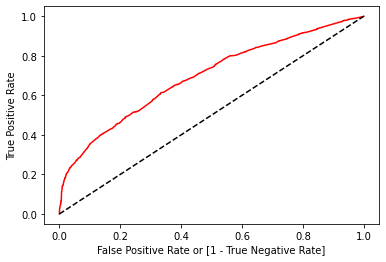

In [80]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [81]:
auc

0.6363252827944298